In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import os
from IPython.display import clear_output

In [ ]:
sample_size = 500
width = 150
height = 150

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/meatu

/content/drive/MyDrive/meatu


In [ ]:
files = ['Fresh', 'Spoiled']
adress = '/content/drive/MyDrive/meatu/{}'
data = {}
for f in files:
    data[f]=[]
for col in files:
    os.chdir(adress.format(col))
    for i in os.listdir(os.getcwd()):
        if i.endswith('.jpg'):
            data[col].append(i)

In [ ]:
!ls "/content/drive/MyDrive/meatu/"

Fresh  Spoiled


In [ ]:
pd.DataFrame(data).head()

,Fresh,Spoiled
0,test_20171017_071721D.jpg,test_20171018_155521D.jpg
1,test_20171017_082921D.jpg,test_20171018_152921D.jpg
2,test_20171017_075721D.jpg,test_20171018_160121D.jpg
3,test_20171017_082121D.jpg,test_20171018_153121D.jpg
4,test_20171017_081721D.jpg,test_20171018_152521D.jpg


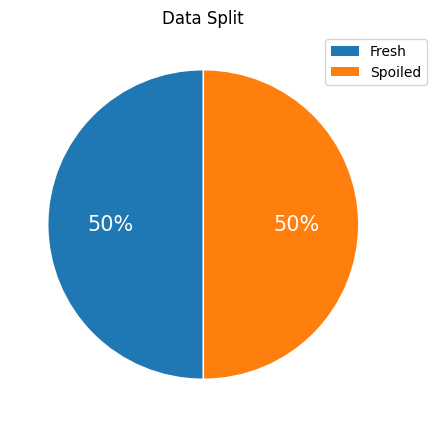

In [ ]:
sizes = [len(data['Fresh']), len(data['Spoiled'])]

plt.figure(figsize=(10,5), dpi=100)

plt.pie(x=sizes,autopct='%1.0f%%',shadow=False, textprops={'color':"w","fontsize":15}, startangle=90,explode=(0,.01))
plt.legend(files,bbox_to_anchor=(0.4, 0, .7, 1))
plt.title("Data Split")
plt.show()

In [ ]:
start = time.time()
image_data = []
image_target = []

for title in files:
    os.chdir(adress.format(title))
    counter = 0
    for i in data[title]:
        img = cv2.imread(i)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        image_data.append(cv2.resize(img,(width, height)))
        image_target.append(title)
        counter += 1
        if counter == sample_size:
            break
    clear_output(wait=True)
    print("Compiled Class",title)
calculate_time = time.time() - start
print("Calculate Time",round(calculate_time,5))

Compiled Class Spoiled
Calculate Time 326.54874


In [ ]:
image_data = np.array(image_data)
size = image_data.shape[0]
image_data.shape

(1000, 150, 150, 3)

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

In [ ]:
labels = LabelEncoder()
labels.fit(image_target)

LabelEncoder()

In [ ]:
X = image_data / 255.0
y = labels.transform(image_target)
train_images, test_images, train_labels, test_labels = train_test_split(X,y, test_size=0.3, random_state=123)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(35, (3, 3), activation='relu', input_shape=(width,height,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


22/22 [==============================] - 44s 2s/step - loss: 1.0726 - accuracy: 0.5343 - val_loss: 0.6945 - val_accuracy: 0.4967
Epoch 2/10
22/22 [==============================] - 43s 2s/step - loss: 0.6881 - accuracy: 0.5114 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 3/10
22/22 [==============================] - 46s 2s/step - loss: 0.6932 - accuracy: 0.4986 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 4/10
22/22 [==============================] - 43s 2s/step - loss: 0.6822 - accuracy: 0.5757 - val_loss: 0.6710 - val_accuracy: 0.8867
Epoch 5/10
22/22 [==============================] - 41s 2s/step - loss: 0.6924 - accuracy: 0.5129 - val_loss: 0.6931 - val_accuracy: 0.5033
Epoch 6/10
22/22 [==============================] - 46s 2s/step - loss: 0.6887 - accuracy: 0.5286 - val_loss: 0.6710 - val_accuracy: 0.9267
Epoch 7/10
22/22 [==============================] - 47s 2s/step - loss: 0.5941 - accuracy: 0.7357 - val_loss: 0.5012 - val_accuracy: 0.9633
Epoch 8/10
14/22 [=============

10/10 - 4s - loss: 0.1044 - accuracy: 0.9800 - 4s/epoch - 371ms/step


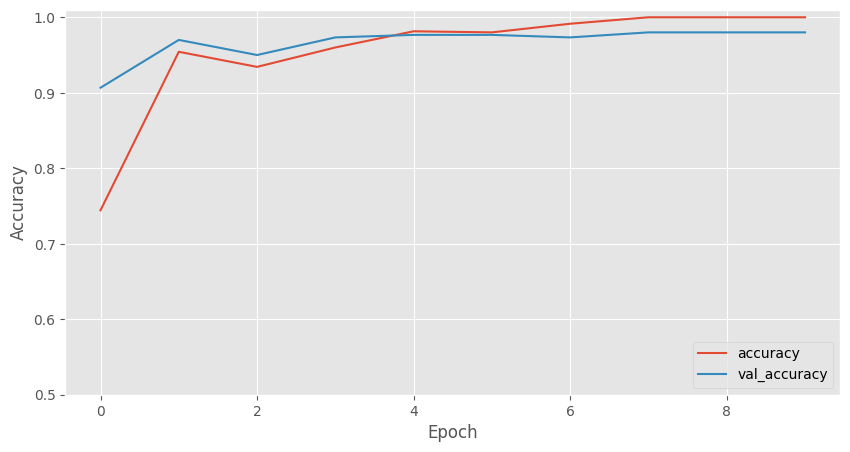

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.01])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [ ]:
result=model.evaluate(test_images, test_labels)

10/10 [==============================] - 5s 488ms/step - loss: 0.1044 - accuracy: 0.9800


In [ ]:
for i in range(len(model.metrics_names)):
    print(model.metrics_names[i],":",result[i])

loss : 0.10442250221967697
accuracy : 0.9800000190734863


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 35)      980       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 74, 74, 35)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        20224     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 73984)            

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

10/10 [==============================] - 5s 415ms/step


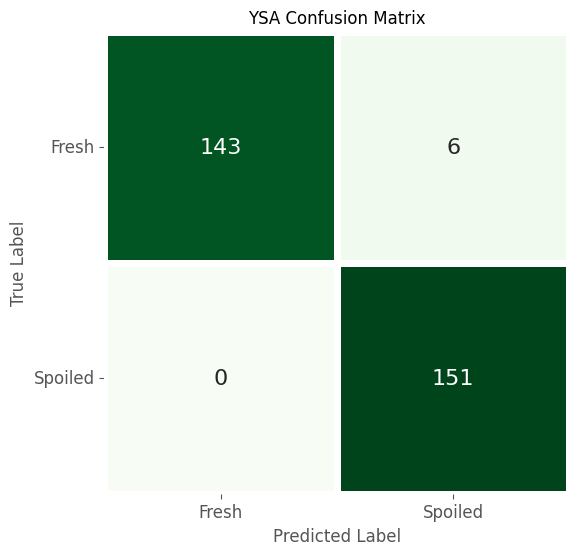

In [ ]:
y_pred = model.predict(test_images)

def toClass(pred):

    class_ = np.zeros(len(pred))
    for i in range(len(pred)):
        index = pred[i].argmax()
        class_[i] = index

    return class_

cm = confusion_matrix(test_labels,toClass(y_pred))

df1 = pd.DataFrame(columns=["Fresh","Spoiled"], index= ["Fresh","Spoiled"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("YSA Confusion Matrix", size = 12)
plt.show()

In [ ]:
def Prediction(image):

    global width, height, files, labels

    img = cv2.resize(image,(width,height))

    test = img / 255.0

    pred = model.predict(np.array([image])).argmax()

    return labels.inverse_transform([pred])[0]

In [ ]:
plt.figure(figsize=(15,15))
for i in range(1,17):
    fig = np.random.choice(np.arange(size))
    plt.subplot(4,4,i)
    plt.imshow(image_data[fig])
    if image_target[fig]=='Fresh':
        c='green'
    else:
        c='red'
    plt.title(image_target[fig], color=c)
    plt.ylabel("| Pred:{} |".format(Prediction(image_data[fig])),fontsize=17, color=c)
    plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
from tensorflow.keras.models import load_model


Saving WhatsApp Image 2023-06-14 at 23.33.03.jpeg to WhatsApp Image 2023-06-14 at 23.33.03.jpeg
1/1 [==============================] - 0s 38ms/step
Rentang hasil prediksi:
Nilai Minimum: 0.823874
Nilai Maksimum: 0.9620932
WhatsApp Image 2023-06-14 at 23.33.03.jpeg
This Image belongs to class Fresh


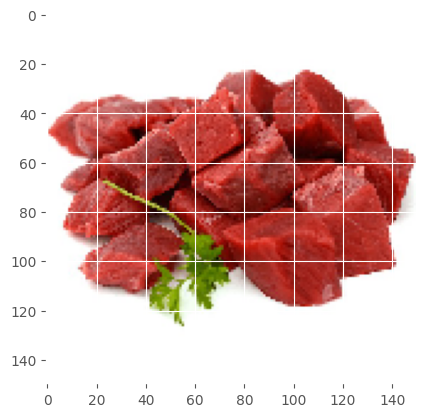

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras import utils
from google.colab import files

# Upload gambar
uploaded = files.upload()

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = x / 255.0  # Normalisasi gambar seperti saat melatih model

    # Melakukan prediksi
    classes = model.predict(x, batch_size=1)
    nilai_min = np.min(classes)
    nilai_max = np.max(classes)

    print("Rentang hasil prediksi:")
    print("Nilai Minimum:", nilai_min)
    print("Nilai Maksimum:", nilai_max)

    print(fn)

    class_list = ['Fresh', 'Spoiled']  # Ganti dengan daftar kelas yang sesuai

    predicted_class = class_list[np.argmax(classes[0])]
    print('This Image belongs to class', predicted_class)

In [ ]:
model.save('/content/drive/MyDrive/saved models/freshspoiled4.hdf5')